# Metrics usage

This example shows how to use metrics to measure the quality of the generated samples. The metrics take two samples (real and generated) and estimate discrepancies between their distributions. The smaller metrics values the better. 

## Generate two samples

Let's generate two samples from multivariate normal distributions with the same covariance matrices, but with some distance between their means. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from probaforms import metrics

In [2]:
def gen_two_samples(dist, N):
    sigma = np.array([[1, 0.7], [0.7, 1]])
    mu_x = np.array([0, 0])
    mu_y = mu_x + dist/np.sqrt(2)
    X = np.random.multivariate_normal(mu_x, sigma, N)
    Y = np.random.multivariate_normal(mu_y, sigma, N)
    return X, Y

In [3]:
# generate two samples with a size of 1000
dist = 2
X, Y = gen_two_samples(dist, N=1000)

In [4]:
def plot_samples(X, Y, dist=0):
    plt.figure(figsize=(6, 4))
    plt.scatter(X[:, 0], X[:, 1], label='X', alpha=0.5, color='C0')
    plt.scatter(Y[:, 0], Y[:, 1], label='Y', alpha=0.5, color='C1')
    plt.title("Distance = %.f" % (dist))
    plt.legend()
    plt.tight_layout()
    plt.show()

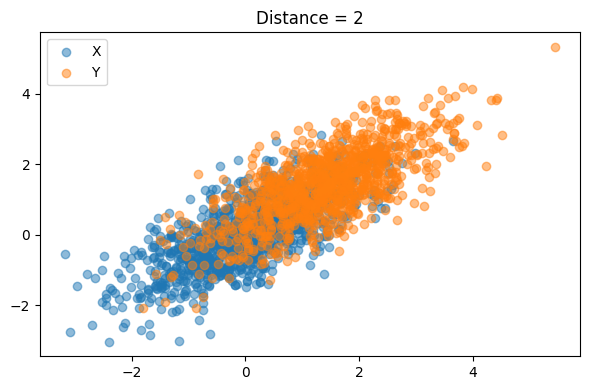

In [5]:
plot_samples(X, Y, dist)

## Compute discrepancies between the samples

In [6]:
def get_metrics(X, Y):
    mu, sigma = metrics.frechet_distance(X, Y)
    print(r"Frechet Distance         = %.6f +- %.6f" % (mu, sigma))
    mu, sigma = metrics.kolmogorov_smirnov_1d(X, Y)
    print(r"Kolmogorov-Smirnov       = %.6f +- %.6f" % (mu, sigma))
    mu, sigma = metrics.cramer_von_mises_1d(X, Y)
    print(r"Cramer-von Mises         = %.6f +- %.6f" % (mu, sigma))
    mu, sigma = metrics.anderson_darling_1d(X, Y)
    print(r"Anderson-Darling         = %.6f +- %.6f" % (mu, sigma))
    mu, sigma = metrics.roc_auc_score_1d(X, Y)
    print(r"ROC AUC                  = %.6f +- %.6f" % (mu, sigma))
    mu, sigma = metrics.kullback_leibler_1d_kde(X, Y)
    print(r"Kullback-Leibler KDE     = %.6f +- %.6f" % (mu, sigma))
    mu, sigma = metrics.jensen_shannon_1d_kde(X, Y)
    print(r"Jensen-Shannon KDE       = %.6f +- %.6f" % (mu, sigma))
    mu, sigma = metrics.maximum_mean_discrepancy(X, Y)
    print(r"Maximum Mean Discrepancy = %.6f +- %.6f" % (mu, sigma))

In [7]:
get_metrics(X, Y)

Frechet Distance         = 3.711472 +- 0.240218
Kolmogorov-Smirnov       = 0.509375 +- 0.015197
Cramer-von Mises         = 64.544793 +- 3.777022
Anderson-Darling         = 423.161173 +- 20.731482
ROC AUC                  = 0.824993 +- 0.007886
Kullback-Leibler KDE     = 0.852085 +- 0.063555
Jensen-Shannon KDE       = 0.173695 +- 0.009267
Maximum Mean Discrepancy = 0.305732 +- 0.019054


## Additional experiments with other distances

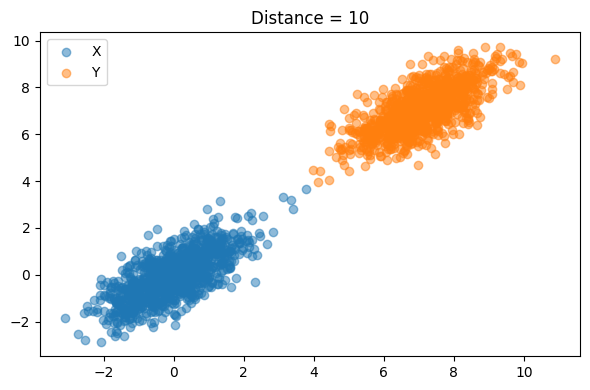

Frechet Distance         = 100.640957 +- 1.078155
Kolmogorov-Smirnov       = 1.000000 +- 0.000000
Cramer-von Mises         = 166.667082 +- 0.000017
Anderson-Darling         = 1015.172596 +- 0.022680
ROC AUC                  = 1.000000 +- 0.000000
Kullback-Leibler KDE     = 12.633292 +- 0.031014
Jensen-Shannon KDE       = 0.692143 +- 0.000470
Maximum Mean Discrepancy = 1.502160 +- 0.007987


In [8]:
dist = 10.
X, Y = gen_two_samples(dist, N=1000)
plot_samples(X, Y, dist)
get_metrics(X, Y)

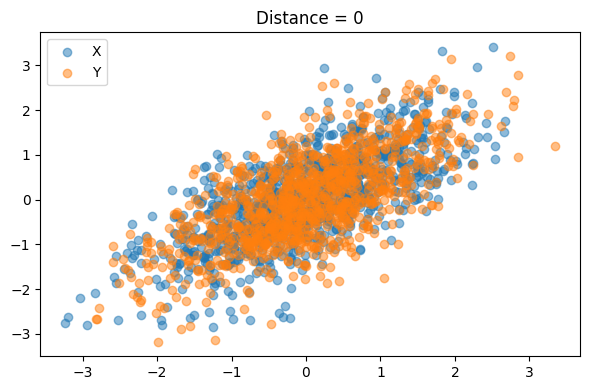

Frechet Distance         = 0.007647 +- 0.005009
Kolmogorov-Smirnov       = 0.053815 +- 0.010366
Cramer-von Mises         = 0.325126 +- 0.186177
Anderson-Darling         = 0.955208 +- 0.973257
ROC AUC                  = 0.513250 +- 0.005923
Kullback-Leibler KDE     = 0.011113 +- 0.003471
Jensen-Shannon KDE       = 0.002718 +- 0.000755
Maximum Mean Discrepancy = 0.001662 +- 0.001076


In [9]:
dist = 0.
X, Y = gen_two_samples(dist, N=1000)
plot_samples(X, Y, dist)
get_metrics(X, Y)